In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = pd.read_csv('/data/acker/ALA/ranks_washu_max_2018_2020.csv')
df

,State,State Abbreviation,GEOID,EPA 2018-2020 DV,WashU GL 2018-2020 DV Max,2018-2020 Rank
0,Alaska,AK,2090,13.0,11.4,56
1,California,CA,6031,16.6,14.8,23
2,California,CA,6029,17.6,17.3,16
3,California,CA,6107,16.6,18.2,10
4,California,CA,6063,15.9,17.1,17
...,...,...,...,...,...,...
3138,Wyoming,WY,56031,NaN,6.6,2432
3139,Wyoming,WY,56045,NaN,9.2,276
3140,Wyoming,WY,56019,NaN,6.8,2267
3141,Wyoming,WY,56027,NaN,8.1,1070


In [3]:
df1 = df.sort_values(by='2018-2020 Rank', ascending=True)
df1

,State,State Abbreviation,GEOID,EPA 2018-2020 DV,WashU GL 2018-2020 DV Max,2018-2020 Rank
6,California,CA,6019,15.7,29.4,1
7,California,CA,6039,13.5,28.0,2
655,California,CA,6105,NaN,27.2,3
315,California,CA,6045,9.2,25.7,4
664,California,CA,6103,9.7,25.1,5
...,...,...,...,...,...,...
557,Alaska,AK,2195,NaN,4.2,3138
576,Alaska,AK,2230,NaN,4.2,3138
917,Hawaii,HI,15005,NaN,3.8,3141
490,Hawaii,HI,15007,2.9,3.3,3142


In [4]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [5]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

counties_conus = counties_conus.drop(['STATEFP', 'COUNTYFP', "COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [11]:
counties_conus['GEOID'] = counties_conus['GEOID'].astype(int)

In [21]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
df_counties = df1.merge(counties_conus[['GEOID', 'geometry','STUSPS']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
df_counties = gpd.GeoDataFrame(df_counties, geometry='geometry')

# Display the result
df_counties


,State,State Abbreviation,GEOID,EPA 2018-2020 DV,WashU GL 2018-2020 DV Max,2018-2020 Rank,geometry,STUSPS
0,California,CA,6019,15.7,29.4,1,"POLYGON ((-120.90942 36.7477, -120.90724 36.74...",CA
1,California,CA,6039,13.5,28.0,2,"POLYGON ((-120.54554 37.02758, -120.54398 37.0...",CA
2,California,CA,6105,NaN,27.2,3,"POLYGON ((-123.62239 40.9317, -123.61456 40.93...",CA
3,California,CA,6045,9.2,25.7,4,"POLYGON ((-124.02325 40.00128, -123.93545 40.0...",CA
4,California,CA,6103,9.7,25.1,5,"POLYGON ((-123.06543 40.28697, -123.06073 40.2...",CA
...,...,...,...,...,...,...,...,...
3138,Alaska,AK,2195,NaN,4.2,3138,"MULTIPOLYGON (((-132.7718 56.49484, -132.76785...",AK
3139,Alaska,AK,2230,NaN,4.2,3138,"POLYGON ((-135.69827 59.73548, -135.47916 59.7...",AK
3140,Hawaii,HI,15005,NaN,3.8,3141,"POLYGON ((-157.01459 21.18352, -157.01192 21.1...",HI
3141,Hawaii,HI,15007,2.9,3.3,3142,"MULTIPOLYGON (((-159.78794 22.0301, -159.78649...",HI


In [20]:
import numpy as np

# Extract the North Slope row from `counties_conus`
north_slope = counties[counties['GEOID'] == '02185'].copy()

# Set the `PM25_90th` column to None (or NaN) so it appears gray on the plot
north_slope['DV'] = np.nan

In [22]:
df_counties = df_counties[df_counties['WashU GL 2018-2020 DV Max'] != 0]

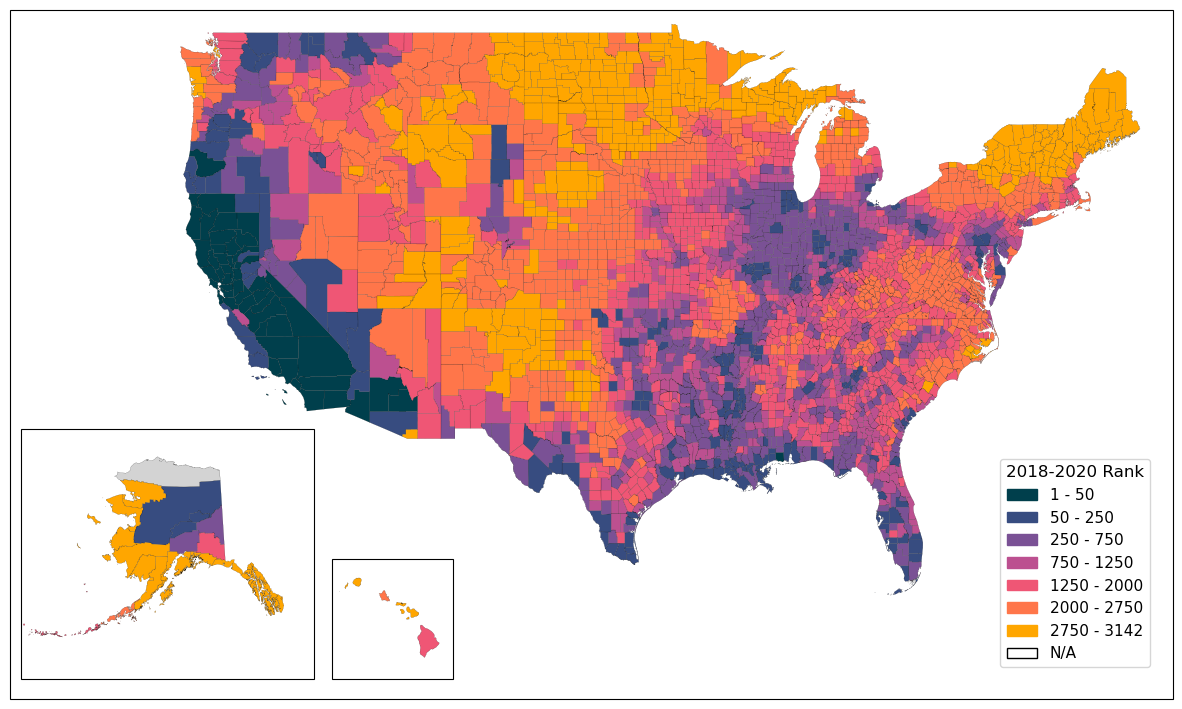

In [30]:
#figure 2
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

county_90th_percentile_with_geometry = df_counties.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = '2018-2020 Rank'
range_colors = {
    "1 - 50": "#003f4c",
    "50 - 250": "#374c80",
    "250 - 750": "#7a5195",
    "750 - 1250": "#bc5090",
    "1250 - 2000": "#ef5675",
    "2000 - 2750": "#ff764a",
    "2750 - 3142": "#ffa600",
}

# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif 2750 < value <= 3142:
        return range_colors["2750 - 3142"]
    elif 2000 < value <= 2750:
        return range_colors["2000 - 2750"]
    elif 1250 < value <= 2000:
        return range_colors["1250 - 2000"]
    elif 750 < value <= 1250:
        return range_colors["750 - 1250"]
    elif 250 < value <= 750:
        return range_colors["250 - 750"]
    elif 50 < value <= 250:
        return range_colors["50 - 250"]
    elif 1 <= value <= 50:  # > 12
        return range_colors["1 - 50"]

# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope


# Plot Alaska counties
'''alaska_counties.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["1 - 50", "50 - 250", "250 - 750", "750 - 1250", "1250 - 2000", "2000 - 2750", "2750 - 3142"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in labels]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2018-2020 Rank",
    fontsize=11,
    title_fontsize=12
)

# Add a title to the plot
plt.show()


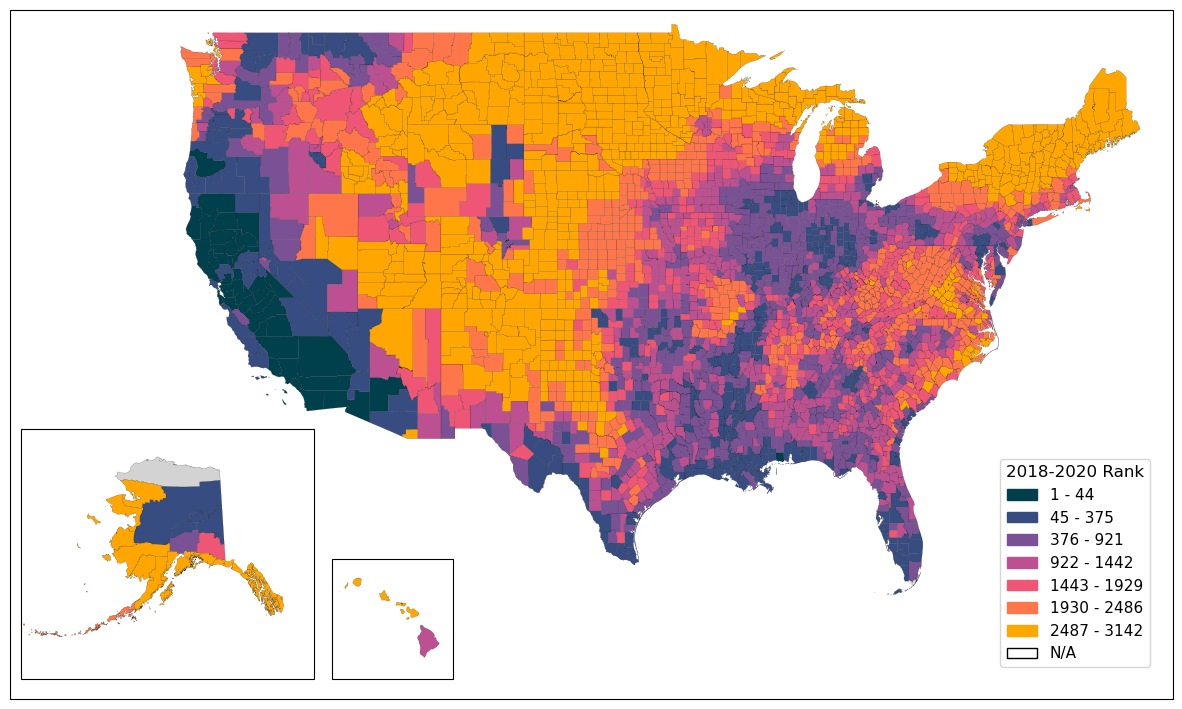

In [67]:
# Define updated rank ranges and colors; this is one in paper rn
range_colors = {
    "1 - 44": "#003f4c",
    "45 - 375": "#374c80",
    "376 - 921": "#7a5195",
    "922 - 1442": "#bc5090",
    "1443 - 1929": "#ef5675",
    "1930 - 2486": "#ff764a",
    "2487 - 3142": "#ffa600",
}

# Assign colors manually based on new rank ranges
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif 2487 <= value <= 3142:
        return range_colors["2487 - 3142"]
    elif 1930 <= value <= 2486:
        return range_colors["1930 - 2486"]
    elif 1443 <= value <= 1929:
        return range_colors["1443 - 1929"]
    elif 922 <= value <= 1442:
        return range_colors["922 - 1442"]
    elif 376 <= value <= 921:
        return range_colors["376 - 921"]
    elif 45 <= value <= 375:
        return range_colors["45 - 375"]
    elif 1 <= value <= 44:
        return range_colors["1 - 44"]

# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry[data_column].apply(assign_color)

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)
ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
labels = ["1 - 44", "45 - 375", "376 - 921", "922 - 1442", "1443 - 1929", "1930 - 2486", "2487 - 3142"]
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in labels]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")
legend_patches.append(na_patch)

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2018-2020 Rank",
    fontsize=11,
    title_fontsize=12
)

# Show the plot
plt.show()


In [66]:
# Define revised rank ranges (7 ranges in total)
rank_ranges = {
    "1 - 44": (1, 44),
    "45 - 375": (45, 375),
    "376 - 750": (376, 750),
    "751 - 1250": (751, 1250),
    "1251 - 1750": (1251, 1750),
    "1751 - 2750": (1751, 2750),
    "2751 - 3142": (2751, 3142)
}

# Initialize a dictionary to store results
cdve_ranges = {}

# Calculate the range of CDVEs for each rank range
for label, (rank_min, rank_max) in rank_ranges.items():
    # Filter dataframe for the current rank range
    filtered_df = county_90th_percentile_with_geometry[
        (county_90th_percentile_with_geometry["2018-2020 Rank"] >= rank_min) &
        (county_90th_percentile_with_geometry["2018-2020 Rank"] <= rank_max)
    ]
    
    # Calculate the min and max CDVE values
    min_cdve = filtered_df["WashU GL 2018-2020 DV Max"].min()
    max_cdve = filtered_df["WashU GL 2018-2020 DV Max"].max()
    
    # Store the result
    cdve_ranges[label] = (min_cdve, max_cdve)

# Display the results
for label, (min_cdve, max_cdve) in cdve_ranges.items():
    print(f"{label}: CDVE Range: {min_cdve:.2f} to {max_cdve:.2f} µg/m³")


1 - 44: CDVE Range: 12.10 to 29.40 µg/m³
45 - 375: CDVE Range: 9.10 to 12.00 µg/m³
376 - 750: CDVE Range: 8.50 to 9.00 µg/m³
751 - 1250: CDVE Range: 8.00 to 8.40 µg/m³
1251 - 1750: CDVE Range: 7.40 to 7.90 µg/m³
1751 - 2750: CDVE Range: 6.10 to 7.30 µg/m³
2751 - 3142: CDVE Range: 3.30 to 6.00 µg/m³


In [27]:
 #Set values that are 0 in F2020_2022 to NaN in gdf_epa
df_counties.loc[df_counties['EPA 2018-2020 DV'] == 0, 'EPA 2018-2020 DV'] = np.nan

# Drop rows where F2020_2022 is NaN, so only counties with valid EPA data remain
df_epa = df_counties.dropna(subset=['EPA 2018-2020 DV'], inplace=False)

# Step 1: Identify GEOIDs with valid F2020_2022 values in gdf_epa
epa_geoids = df_epa['GEOID'].unique()

# Step 3: Identify unmonitored counties
unmonitored_counties = df_counties[
    ~df_counties['GEOID'].isin(epa_geoids)
]

# Step 2: Update PM25_90th in county_90th_percentile_with_geometry to NaN for GEOIDs not in epa_geoids
df_counties.loc[
    ~df_counties['GEOID'].isin(epa_geoids), 'WashU GL 2018-2020 DV Max'
] = np.nan
unmonitored_counties

,State,State Abbreviation,GEOID,EPA 2018-2020 DV,WashU GL 2018-2020 DV Max,2018-2020 Rank,geometry,STUSPS
2,California,CA,6105,NaN,27.2,3,"POLYGON ((-123.62239 40.9317, -123.61456 40.93...",CA
5,California,CA,6021,NaN,23.5,6,"POLYGON ((-122.93795 39.74988, -122.93743 39.7...",CA
8,California,CA,6043,NaN,19.1,9,"POLYGON ((-120.39442 37.67504, -120.3925 37.67...",CA
24,California,CA,6109,NaN,14.5,25,"POLYGON ((-120.65324 37.83282, -120.64865 37.8...",CA
27,California,CA,6091,NaN,14.3,28,"POLYGON ((-121.05748 39.53999, -121.05643 39.5...",CA
...,...,...,...,...,...,...,...,...
3134,Alaska,AK,2100,NaN,4.5,3135,"MULTIPOLYGON (((-135.08523 58.26655, -135.0769...",AK
3137,Michigan,MI,26083,NaN,4.2,3138,"MULTIPOLYGON (((-87.65066 47.41747, -87.6464 4...",MI
3138,Alaska,AK,2195,NaN,4.2,3138,"MULTIPOLYGON (((-132.7718 56.49484, -132.76785...",AK
3139,Alaska,AK,2230,NaN,4.2,3138,"POLYGON ((-135.69827 59.73548, -135.47916 59.7...",AK


In [28]:
df2 = df_counties.drop(['EPA 2018-2020 DV'], axis=1)
monitored = df2.dropna()

In [68]:
# Define a function to assign range categories
def assign_range(value):
    if pd.isna(value):
        return 'N/A'
    elif 2487 <= value <= 3142:
        return "2487 - 3142"
    elif 1930 <= value <= 2486:
        return "1930 - 2486"
    elif 1443 <= value <= 1929:
        return "1443 - 1929"
    elif 922 <= value <= 1442:
        return "922 - 1442"
    elif 376 <= value <= 921:
        return "376 - 921"
    elif 45 <= value <= 375:
        return "45 - 375"
    elif 1 <= value <= 44:
        return "1 - 44"


# Assign range categories
unmonitored_counties['range'] = unmonitored_counties['2018-2020 Rank'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    unmonitored_counties.groupby('range')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)

# Display the summary
print(summary)


         range  count
0       1 - 44      8
1  1443 - 1929    363
2  1930 - 2486    517
3  2487 - 3142    574
4    376 - 921    488
5     45 - 375    208
6   922 - 1442    465


/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [69]:
# Assign range categories
monitored['range'] = monitored['2018-2020 Rank'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    monitored.groupby('range')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)
# Display the summary
print(summary)

         range  count
0       1 - 44     37
1  1443 - 1929     50
2  1930 - 2486     42
3  2487 - 3142     70
4    376 - 921    115
5     45 - 375    130
6   922 - 1442     75


/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [70]:
df = df[df['WashU GL 2018-2020 DV Max'] != 0]

In [71]:
# Assign range categories
df['range'] = df['2018-2020 Rank'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    df.groupby('range')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)
# Display the summary
print(summary)

         range  count
0       1 - 44     45
1  1443 - 1929    413
2  1930 - 2486    559
3  2487 - 3142    644
4    376 - 921    603
5     45 - 375    338
6   922 - 1442    540


/tmp/ipykernel_40259/529630541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'] = df['2018-2020 Rank'].apply(assign_range)


In [76]:
def assign_range(value):
    if pd.isna(value):
        return 'N/A'
    elif 12.1 <= value <= 29.4:
        return "tier1"
    elif 9.1 <= value <= 12:
        return "tier2"
    elif 8.5 <= value <= 9:
        return "tier3"
    elif 8 <= value <= 8.4:
        return "tier4"
    elif 7.4 <= value <= 7.9:
        return "tier5"
    elif 6.1 <= value <= 7.3:
        return "tier6"
    elif 3.3 <= value <= 6:
        return "tier7"
    else:
        return 'lower'
# Assign range categories
df_epa['range'] = df_epa['EPA 2018-2020 DV'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    df_epa.groupby('range')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)
# Display the summary
print(summary)

   range  count
0  lower      7
1  tier1     21
2  tier2     73
3  tier3     61
4  tier4     66
5  tier5     86
6  tier6    129
7  tier7     76


/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
